In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.registration import register
import random as pr

def rargmax(vector):
    m = np.amax(vector)
    indices = np.nonzero(vector==m)[0]
    return pr.choice(indices)

register(
    id='FrozenLake-v3',
    entry_point = 'gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name':'4x4',
           'is_slippery':False}
)

env = gym.make('FrozenLake-v3')

In [2]:
# Q Table을 모두 0으로 초기화 한다. : 2차원 (number of state, action space) = (16,4)
Q = np.zeros([env.observation_space.n, env.action_space.n])

# 몇 번 시도를 할 것인가 (에피소드)
num_episodes = 2000

# 에피소드마다 총 리워드의 합을 저장하는 리스트
rList = []

In [3]:
# discount 정의 => 미래의 reward를 현재의 reward 보다 조금 낮게 본다.
dis = 0.9

for i in range(num_episodes) : 
    state = env.reset()
    rAll = 0
    done = False
    
    # exploration의 확률 (decaying)
    e = 1./((i / 100) + 1)
    
    # Q learning 알고리즘
    while not done : 
        
        # E-Greedy 알고리즘으로 action 고르기
        if np.random.rand(1) < e :
            action = env.action_space.sample()
        else : 
            action = rargmax(Q[state, :])
        
        # 해당 Action을 했을 때 environment가 변하고, 새로운 state, reward, done 여부를 반환 받음
        new_state, reward, done, _ = env.step(action)
        
        # Q = R + Q 
        Q[state, action] = reward + dis * np.max(Q[new_state, :])
        
        rAll += reward
        state = new_state
        
    rList.append(rAll)

Success rate : 0.798
Final Q-Table Values
[[0.531441  0.59049   0.4782969 0.531441 ]
 [0.531441  0.        0.        0.4782969]
 [0.4782969 0.        0.        0.       ]
 [0.        0.        0.        0.       ]
 [0.59049   0.6561    0.        0.531441 ]
 [0.        0.        0.        0.       ]
 [0.        0.81      0.        0.       ]
 [0.        0.        0.        0.       ]
 [0.6561    0.        0.729     0.59049  ]
 [0.6561    0.81      0.81      0.       ]
 [0.729     0.9       0.        0.729    ]
 [0.        0.        0.        0.       ]
 [0.        0.        0.        0.       ]
 [0.        0.81      0.9       0.729    ]
 [0.81      0.9       1.        0.81     ]
 [0.        0.        0.        0.       ]]


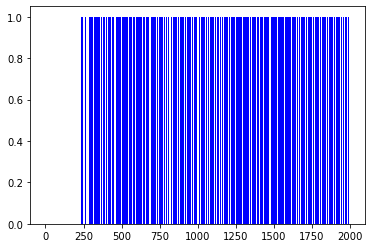

In [4]:
print("Success rate : "+str(sum(rList) / num_episodes))
print("Final Q-Table Values")
print(Q)

plt.bar(range(len(rList)), rList, color="blue")
plt.show()